# Spam & Ham SMS Classification
## Email becomes a powerful tool for communication as it saves a lot of time and cost. It is one of the most popular and secure medium for online transferring and communication messages or data through the web. But, due to the social networks, most of the emails contain unwanted information which is called spam. Identifying such spam emails is one of the important challenges.
## In this project we will use PYTHON text classification technique to identify or classify email spam
### 1. Importing Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns 

### 2. Loading DataSet
#### Load any dataset from kaggle or other website This dataset is in my GitHub account

In [9]:
data = (r'C:\\Users\\Lenovo\\Desktop\\EmailProject.csv')
df = pd.read_csv(data)
df

#1: Predicted as spam
#0: Predicted as ham

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...
...,...,...
83443,0,hi given a date how do i get the last date of ...
83444,1,now you can order software on cd or download i...
83445,1,dear valued member canadianpharmacy provides a...
83446,0,subscribe change profile contact us long term ...


### 3. Cleansing the data
#### * Checking for missing values

In [12]:
missing_values = df.isnull().sum()

# If there are missing values, handle them (for example, by dropping rows with missing values)
if missing_values.any():
    df = df.dropna()

# Print the DataFrame after handling missing values
print("DataFrame after handling missing values:")
print(df.head())

DataFrame after handling missing values:
   label                                               text
0      1  ounce feather bowl hummingbird opec moment ala...
1      1  wulvob get your medircations online qnb ikud v...
2      0   computer connection from cnn com wednesday es...
3      1  university degree obtain a prosperous future m...
4      0  thanks for all your answers guys i know i shou...


#### * Check for duplicate rows

In [14]:
duplicate_rows = df.duplicated()

# If there are duplicate rows, remove them
if duplicate_rows.any():
    df = df.drop_duplicates()

# Print the DataFrame after removing duplicate rows
print("DataFrame after removing duplicate rows:")
print(df.head())

DataFrame after removing duplicate rows:
   label                                               text
0      1  ounce feather bowl hummingbird opec moment ala...
1      1  wulvob get your medircations online qnb ikud v...
2      0   computer connection from cnn com wednesday es...
3      1  university degree obtain a prosperous future m...
4      0  thanks for all your answers guys i know i shou...


### 4. Explore the distribution of spam and non-spam emails
#### 1: Predicted as spam
#### 0: Predicted as ham

In [15]:
spam_distribution = df['label'].value_counts()

# Print the distribution
print("Distribution of Spam and Non-Spam Emails:")
print(spam_distribution)

Distribution of Spam and Non-Spam Emails:
label
1    43910
0    39538
Name: count, dtype: int64


### 5. Feature Extraction:
#### Use the TfidfVectorizer to convert the text data into a numerical format suitable for machine learning algorithms. This will create a TF-IDF matrix representing the importance of words in each document.

In [16]:
vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the max_features parameter
X = vectorizer.fit_transform(df['text']).toarray()

### 6. Train-Test Split:
#### Split your data into training and testing sets using train_test_split.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size=0.3, random_state=42)

### 7. Model Training:
#### Choose a classification algorithm (e.g., Logistic Regression) and train the model using the training set.

In [18]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### 8. Prediction and Evaluation:
#### Use the trained model to make predictions on the test set and evaluate its performance.

In [19]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9833033752746155


### 9. Visualize Results:
#### Create visualizations, such as a confusion matrix, to better understand the performance of your model.

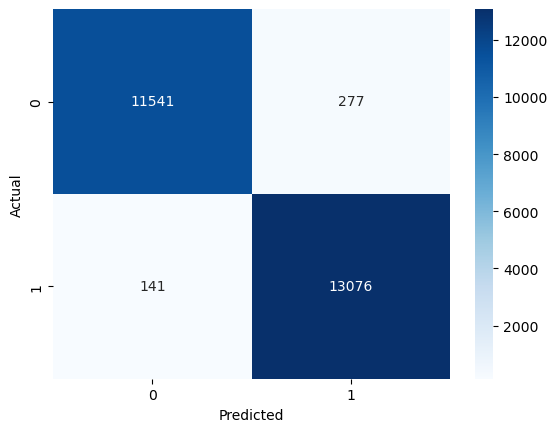

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Interpretation:
## Darker shades of blue represent higher values.
## The diagonal elements (top-left to bottom-right) represent correct predictions (true positives and true negatives).
## Off-diagonal elements represent incorrect predictions (false positives and false negatives).